# General EDA

In [13]:
# referenced: https://medium.com/ml-research-lab/chapter-4-knowledge-from-the-data-and-data-exploration-analysis-99a734792733
# https://amueller.github.io/aml/01-ml-workflow/01-data-loading.html

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib
pd.set_option('display.max_rows', None)

In [15]:
df_flights = pd.read_csv(r'..\2_data\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [16]:
df_flights.shape

(100998, 42)

# Step 1 - Variable Identification

In [17]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100998 entries, 0 to 100997
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              100998 non-null  object 
 1   mkt_unique_carrier   100998 non-null  object 
 2   branded_code_share   100998 non-null  object 
 3   mkt_carrier          100998 non-null  object 
 4   mkt_carrier_fl_num   100998 non-null  int64  
 5   op_unique_carrier    100998 non-null  object 
 6   tail_num             100714 non-null  object 
 7   op_carrier_fl_num    100998 non-null  int64  
 8   origin_airport_id    100998 non-null  int64  
 9   origin               100998 non-null  object 
 10  origin_city_name     100998 non-null  object 
 11  dest_airport_id      100998 non-null  int64  
 12  dest                 100998 non-null  object 
 13  dest_city_name       100998 non-null  object 
 14  crs_dep_time         100998 non-null  int64  
 15  dep_time         

In [18]:
df_flights.dtypes.value_counts()

float64    19
object     12
int64      11
dtype: int64

In [19]:
flights_features = df_flights.drop(columns='arr_delay')
flights_features.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'cancellation_code',
       'diverted', 'dup', 'crs_elapsed_time', 'actual_elapsed_time',
       'air_time', 'flights', 'distance', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime', 'no_name'],
      dtype='object')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

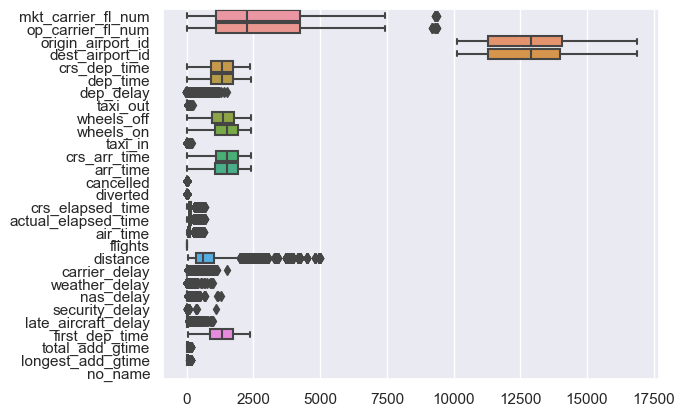

In [20]:
sns.boxplot(data=flights_features, orient='h')

In [21]:
# import matplotlib.pyplot as plt
# # create a grid of plots, with 5 rows and 6 columns
# # and place it on a canvas 18 (virtual) inches whide and 6 inches high
# fig, axes = plt.subplots(5, 6, figsize=(18, 6))
# # for each column (and with one axis after another)
# for c, ax in zip(flights_features.columns, axes.ravel()):
#     # create a box-plot grouped by the target variabel
#     df_flights[[c, 'arr_delay']].boxplot(vert=False, by='arr_delay', ax=ax)
#     # remove the x-axis label
#     ax.set_xlabel("")
# # remove the figure title
# plt.suptitle("")
# # fit everything nicely on the plot
# plt.tight_layout()

Categorical Variables:
- Nominal data = categorizes and labels variables
- Ordinal data = categorizes and labels variables + ranks categories in order

Quantitative Variables:
- Interval data = categorizes and labels variables + ranks categories in order + has known, equal intervals
- Ratio data = categorizes and labels variables + ranks categories in order + has known, equal intervals + has a true or meaningful zero (can't have less than 0)

In [22]:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 100998 entries, 0 to 100997
# Data columns (total 42 columns):
#   Column               Non-Null Count   Dtype  
# ---  ------               --------------   -----  
#  0   fl_date              100998 non-null  object     quantitative - interval (datetime)
#  1   mkt_unique_carrier   100998 non-null  object     categorical - nominal 
#  2   branded_code_share   100998 non-null  object     categorical - nominal
#  3   mkt_carrier          100998 non-null  object     categorical - nominal
#  4   mkt_carrier_fl_num   100998 non-null  int64      categorical - nominal
#  5   op_unique_carrier    100998 non-null  object     categorical - nominal 
#  6   tail_num             100714 non-null  object     categorical - nominal
#  7   op_carrier_fl_num    100998 non-null  int64      categorical - nominal
#  8   origin_airport_id    100998 non-null  int64      categorical - nominal
#  9   origin               100998 non-null  object     categorical - nominal
#  10  origin_city_name     100998 non-null  object     categorical - nominal
#  11  dest_airport_id      100998 non-null  int64      categorical - nominal
#  12  dest                 100998 non-null  object     categorical - nominal
#  13  dest_city_name       100998 non-null  object     categorical - nominal
#  14  crs_dep_time         100998 non-null  int64      quantitative - interval (datetime)
#  15  dep_time             99425 non-null   float64    quantitative - interval (datetime)
#  16  dep_delay            99380 non-null   float64    quantitative - ratio
#  17  taxi_out             99338 non-null   float64    quantitative - ratio
#  18  wheels_off           99338 non-null   float64    quantitative - interval (datetime)
#  19  wheels_on            99303 non-null   float64    quantitative - interval (datetime)
#  20  taxi_in              99303 non-null   float64    quantitative - ratio
#  21  crs_arr_time         100998 non-null  int64      quantitative - interval (datetime)
#  22  arr_time             99339 non-null   float64    quantitative - interval (datetime)
#  23  arr_delay            99110 non-null   float64    quantitative - ratio
#  24  cancelled            100998 non-null  int64      categorical - nominal (boolean)
#  25  cancellation_code    1638 non-null    object     categorical - nominal
#  26  diverted             100998 non-null  int64      categorical - nominal (boolean)
#  27  dup                  100998 non-null  object     categorical - nominal
#  28  crs_elapsed_time     100998 non-null  int64      quantitative - ratio (scheduled elapsed time of flight, in minutes)
#  29  actual_elapsed_time  99131 non-null   float64    quantitative - ratio (actual elapsed time of flight, in minutes)
#  30  air_time             99095 non-null   float64    quantitative - ratio 
#  31  flights              100998 non-null  int64      quantitative - ratio
#  32  distance             100998 non-null  int64      quantitative - ratio
#  33  carrier_delay        19146 non-null   float64    quantitative - ratio
#  34  weather_delay        19146 non-null   float64    quantitative - ratio
#  35  nas_delay            19146 non-null   float64    quantitative - ratio
#  36  security_delay       19146 non-null   float64    quantitative - ratio
#  37  late_aircraft_delay  19146 non-null   float64    quantitative - ratio
#  38  first_dep_time       672 non-null     float64    quantitative - interval (datetime)
#  39  total_add_gtime      672 non-null     float64    quantitative - ratio
#  40  longest_add_gtime    672 non-null     float64    quantitative - ratio
#  41  no_name              0 non-null       float64    empty

In [23]:
df_flights.shape

(100998, 42)

In [24]:
df_flights['mkt_carrier_fl_num'].nunique()

6771

In [25]:
df_flights['op_carrier_fl_num'].nunique()

6773

In [26]:
# create subset of flights dataframe with quantitative ratio data only

quant_ratio_df = df_flights[[
    'dep_delay',
    'arr_delay',
    'taxi_out',
    'taxi_in',
    'crs_elapsed_time',
    'actual_elapsed_time', 
    'flights',
    'distance',
    'carrier_delay',
    'weather_delay',
    'nas_delay', 
    'security_delay',
    'late_aircraft_delay',
    'total_add_gtime',
    'longest_add_gtime']]

In [27]:
# create subset of flights dataframe with quantitative interval data only

quant_interval_df = df_flights[[
    'fl_date',
    'crs_dep_time',
    'dep_time',
    'wheels_off',
    'wheels_on',
    'crs_arr_time',
    'arr_time',
    'first_dep_time'
]]

In [28]:
# create subset of flights dataframe with all quantitative data

numeric_df = pd.concat([quant_ratio_df, quant_interval_df], axis=1)

In [29]:
# create # create subset of flights dataframe with all categorical data

cat_nom_feats = df_flights.drop(columns=list(numeric_df.columns))
cat_nom_feats.head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,cancelled,cancellation_code,diverted,dup,air_time,no_name
0,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,"Las Vegas, NV",13851,OKC,"Oklahoma City, OK",0,NaN,0,N,112.0,NaN
1,WN,WN,WN,989,WN,N287WN,989,12889,LAS,"Las Vegas, NV",13871,OMA,"Omaha, NE",0,NaN,0,N,142.0,NaN
2,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,"Las Vegas, NV",13871,OMA,"Omaha, NE",0,NaN,0,N,132.0,NaN
3,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,"Las Vegas, NV",13891,ONT,"Ontario, CA",0,NaN,0,N,34.0,NaN
4,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,"Las Vegas, NV",13891,ONT,"Ontario, CA",0,NaN,0,N,34.0,NaN


# Step 2 - Univariate Analysis

### Quantitative Variables

For continuous variables: We can build histograms and boxplots for each continuous variable independently. These figures give us an understanding about the variables’ central tendencies and spread.

In [30]:
df_flights.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,100998.000000,100998.000000,100998.000000,100998.000000,100998.000000,99425.000000,99380.000000,99338.000000,99338.000000,99303.000000,...,100998.000000,19146.000000,19146.000000,19146.000000,19146.000000,19146.000000,672.000000,672.000000,672.000000,0.0
mean,2696.313264,2696.343442,12693.375770,12662.781501,1329.826620,1334.333437,10.565144,17.498168,1358.693431,1460.941784,...,774.058486,20.735506,3.208921,16.052491,0.180873,27.209025,1317.239583,40.453869,39.520833,NaN
std,1862.177281,1862.418327,1525.958499,1513.892424,488.757467,502.777726,46.406515,10.066730,504.189165,531.888016,...,585.277397,61.536821,25.406923,36.580173,9.093440,51.823107,507.021348,33.922516,32.637231,NaN
min,1.000000,1.000000,10135.000000,10135.000000,4.000000,1.000000,-35.000000,0.000000,1.000000,1.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,1.000000,NaN
25%,1101.000000,1101.000000,11292.000000,11292.000000,916.000000,919.000000,-6.000000,11.000000,934.000000,1046.000000,...,345.000000,0.000000,0.000000,0.000000,0.000000,0.000000,853.000000,17.000000,17.000000,NaN
50%,2272.000000,2272.000000,12889.000000,12889.000000,1321.000000,1327.000000,-2.000000,15.000000,1341.000000,1500.000000,...,612.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1337.000000,30.000000,30.000000,NaN
75%,4249.750000,4249.000000,14057.000000,14004.000000,1735.000000,1743.000000,6.000000,20.000000,1758.000000,1911.000000,...,1012.000000,18.000000,0.000000,19.000000,0.000000,34.000000,1732.250000,52.000000,50.000000,NaN
max,9386.000000,9386.000000,16869.000000,16869.000000,2359.000000,2400.000000,1503.000000,249.000000,2400.000000,2400.000000,...,4983.000000,1503.000000,1000.000000,1283.000000,1078.000000,970.000000,2357.000000,163.000000,163.000000,NaN


In [49]:
def uni_analyis_continuous(df, feature, feature_title):
    
    import matplotlib.pyplot as plt
    import matplotlib.transforms as mtrans

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Univariate Analysis - {feature_title}')

    sns.boxplot(ax=axes[0], data=df[feature])
    axes[0].set_title(f'{feature_title} Boxplot')
    sns.histplot(ax=axes[1], data=df[feature])
    axes[1].set_title(f'{feature_title} Histogram')

    Minimum = min(df[feature])
    Median = df[feature].median()
    Mean = df[feature].mean()
    Maximum = max(df[feature])
    
    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0, 15, f'Minimum : {Minimum}, Median : {Median}, Mean : {Mean}, Maximum : {Maximum}', ha='center', va='center_baseline')
    txt.set_transform(trans)

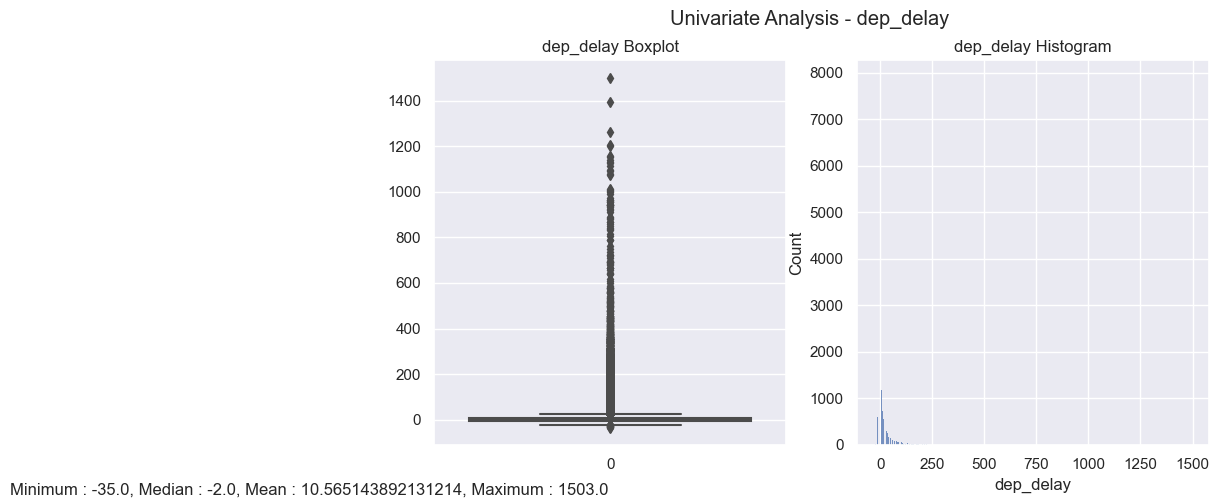

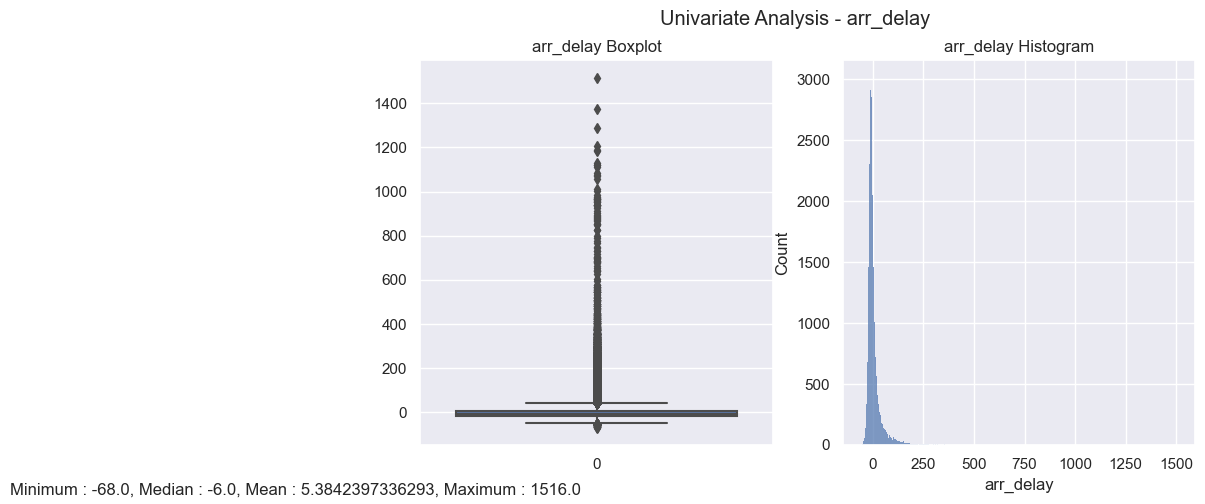

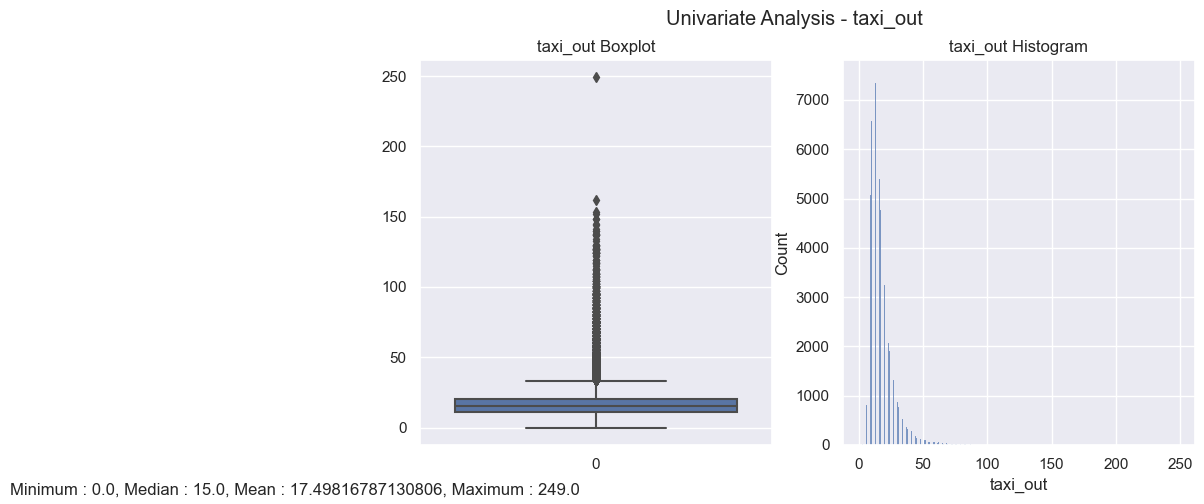

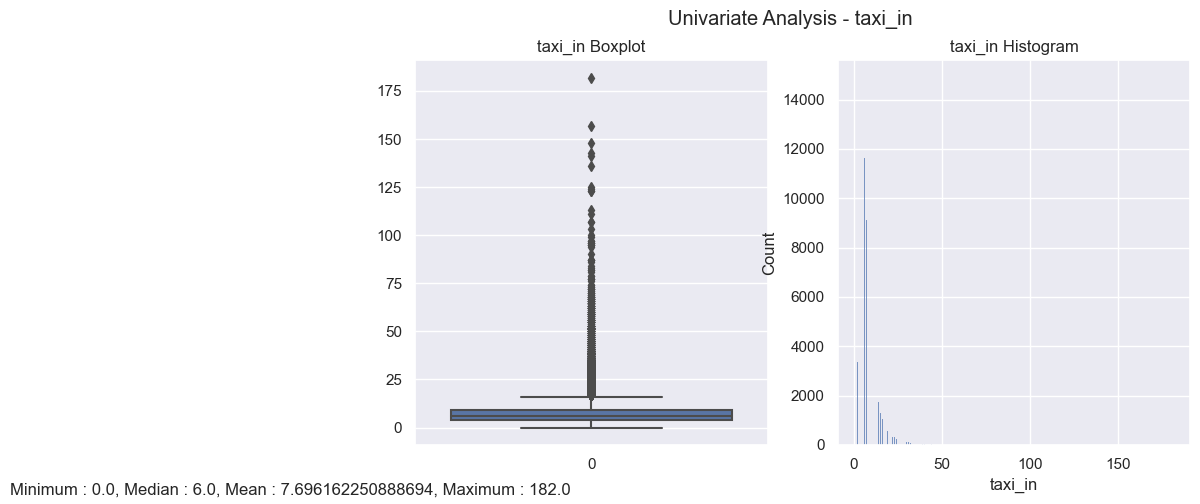

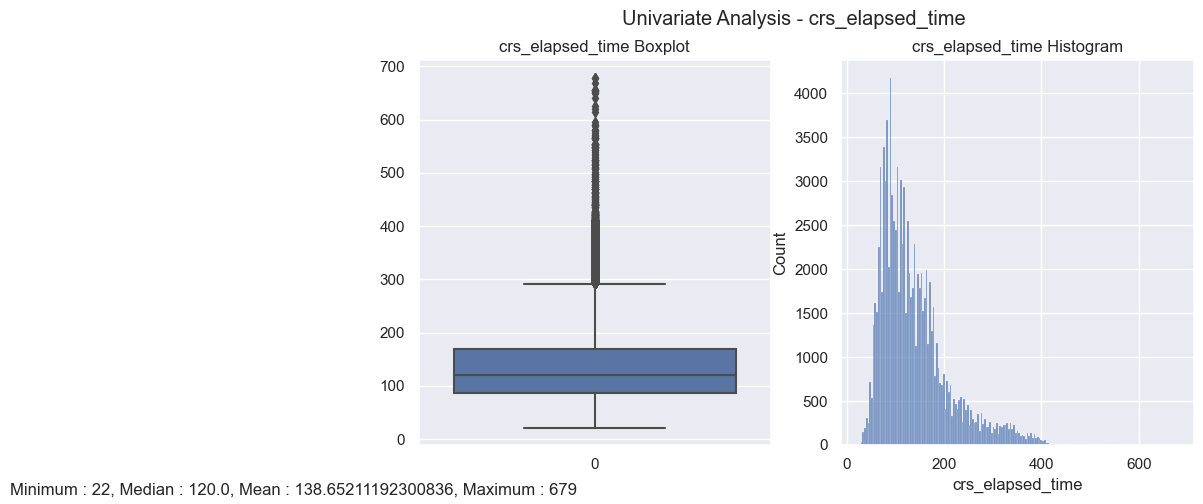

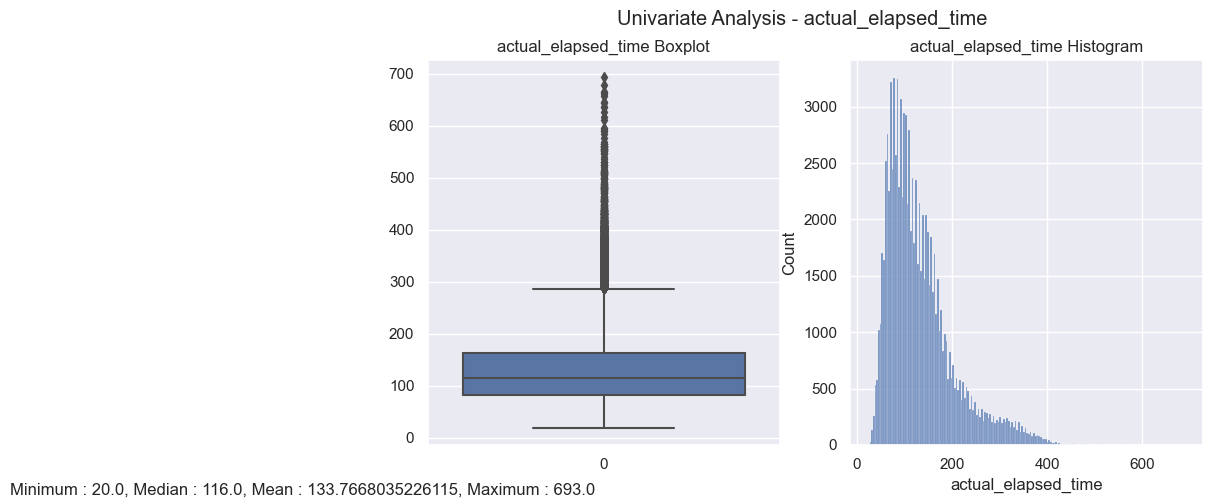

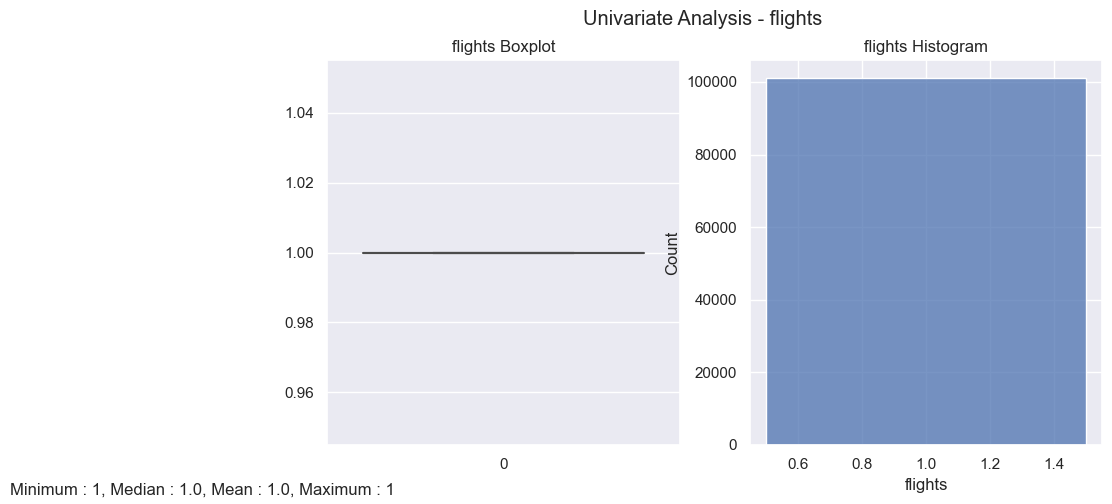

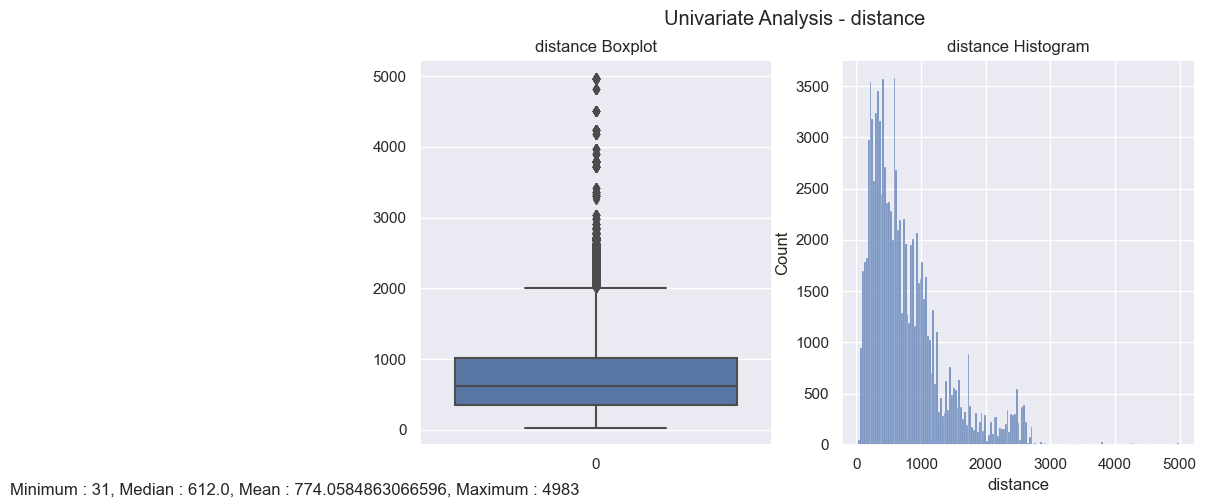

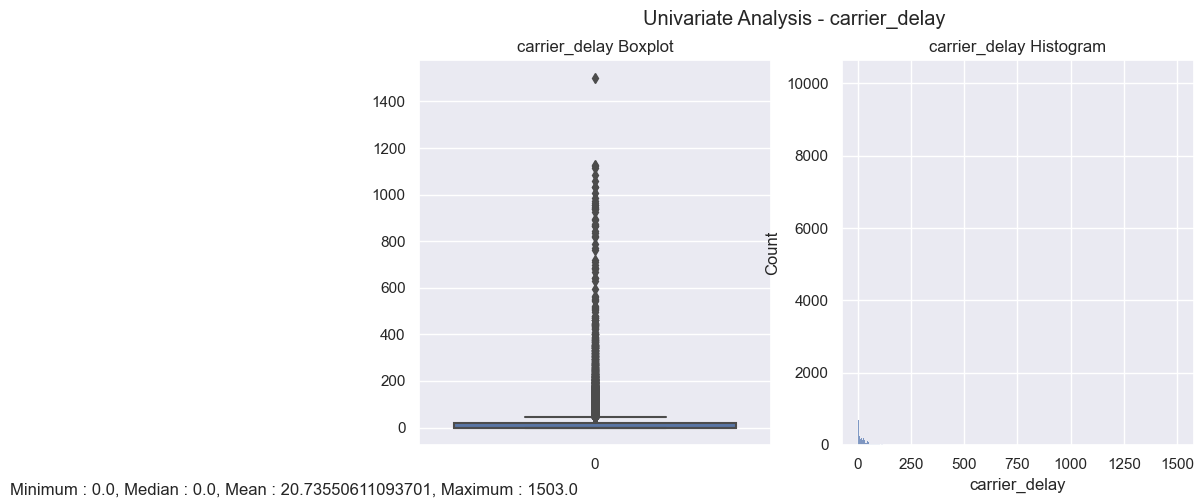

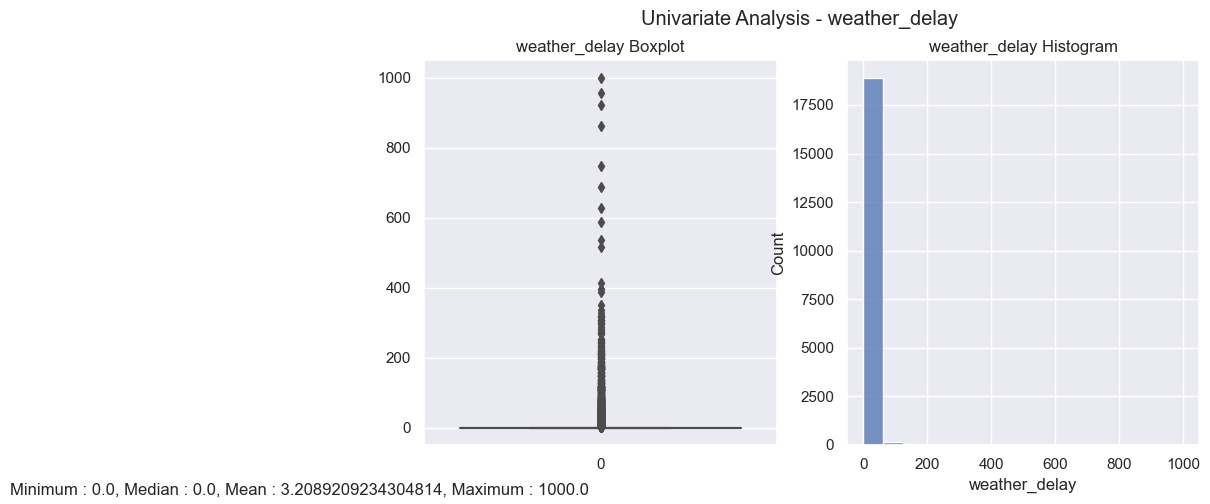

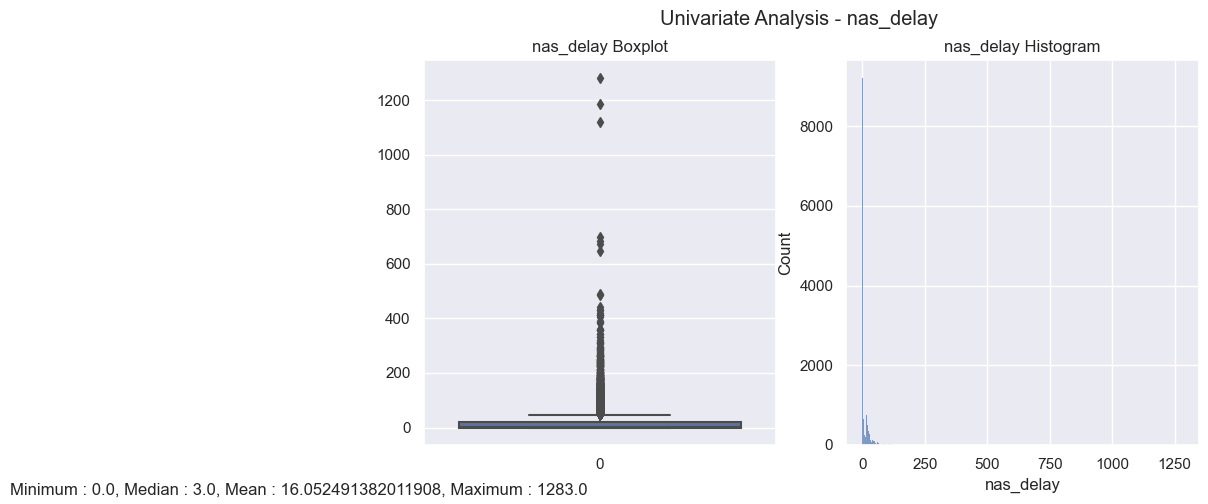

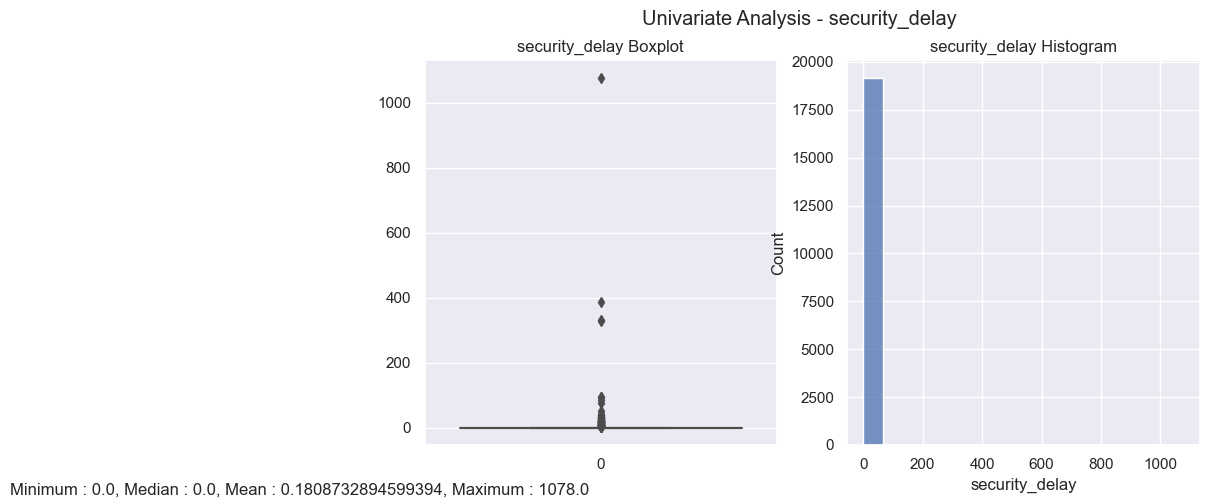

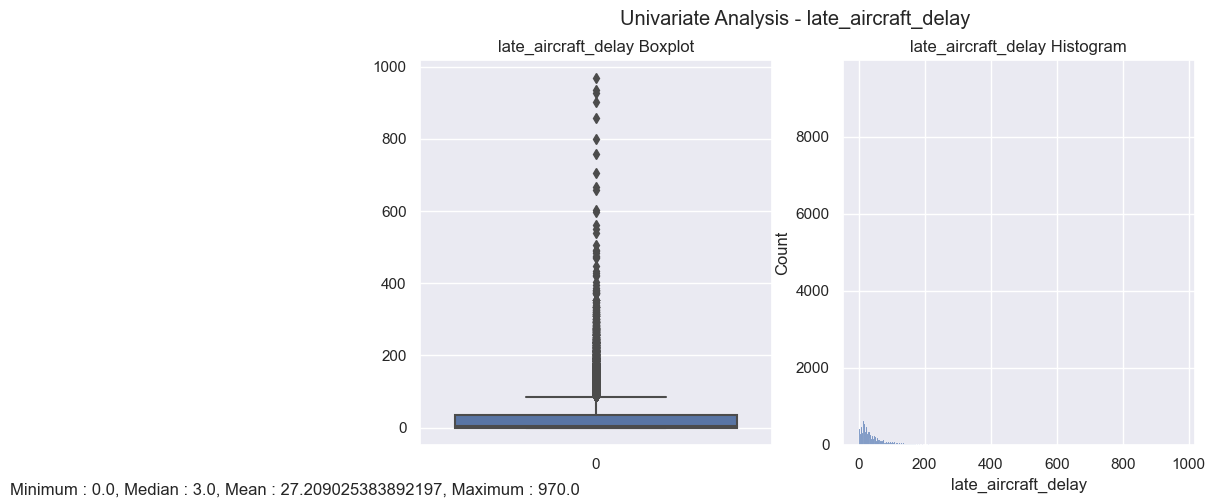

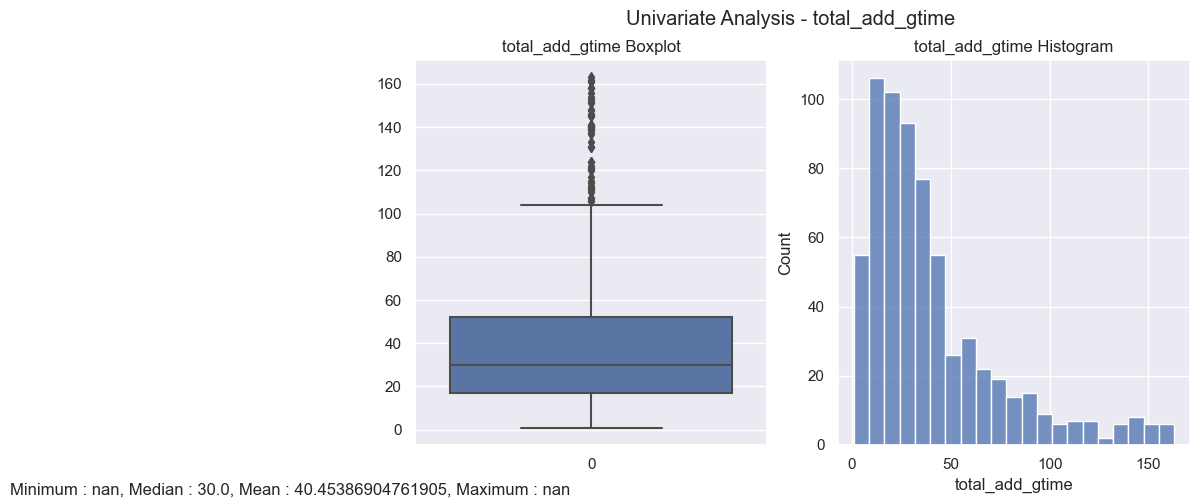

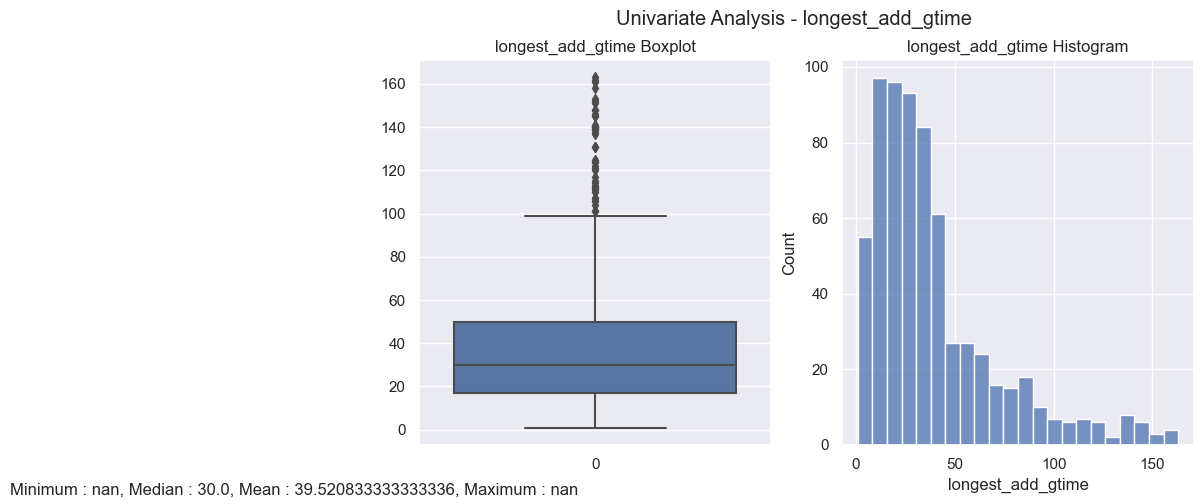

In [50]:
for feat in quant_ratio_df:
    uni_analyis_continuous(df_flights, feature=feat, feature_title=feat)

Much of this data is very skewed - perform transformations / remove outliers before building model?

### Categorical Variables

For categorical variables: Create a count plot visualization that shows the frequencies in each category.

In [33]:
def uni_analyis_categorical(df, feature):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.transforms as mtrans

    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(data = df, y = feature, order = df[feature].value_counts().index, orient='h', palette = 'magma')
    plt.title(f'{feature} frequency')

    cat_count = df[feature].nunique()

    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0, 15, f'Number of categories : {cat_count}', ha='center')
    txt.set_transform(trans)

In [34]:
cat_nom_feats.columns

Index(['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'air_time', 'no_name'],
      dtype='object')

In [35]:
for cat in cat_nom_feats.columns:
    print(f'{cat} unique values: {df_flights[cat].nunique()}')

mkt_unique_carrier unique values: 10
branded_code_share unique values: 15
mkt_carrier unique values: 10
mkt_carrier_fl_num unique values: 6771
op_unique_carrier unique values: 27
tail_num unique values: 6153
op_carrier_fl_num unique values: 6773
origin_airport_id unique values: 369
origin unique values: 369
origin_city_name unique values: 362
dest_airport_id unique values: 370
dest unique values: 370
dest_city_name unique values: 363
cancelled unique values: 2
cancellation_code unique values: 3
diverted unique values: 2
dup unique values: 1
air_time unique values: 484
no_name unique values: 0


In [46]:
df_flights[['origin_airport_id',
'origin',
'origin_city_name',
'dest_airport_id',
'dest',
'dest_city_name']].head()

,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name
0,12889,LAS,"Las Vegas, NV",13851,OKC,"Oklahoma City, OK"
1,12889,LAS,"Las Vegas, NV",13871,OMA,"Omaha, NE"
2,12889,LAS,"Las Vegas, NV",13871,OMA,"Omaha, NE"
3,12889,LAS,"Las Vegas, NV",13891,ONT,"Ontario, CA"
4,12889,LAS,"Las Vegas, NV",13891,ONT,"Ontario, CA"


In [51]:
df_flights[['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier']].head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier
0,WN,WN,WN,5431,WN
1,WN,WN,WN,989,WN
2,WN,WN,WN,1664,WN
3,WN,WN,WN,1106,WN
4,WN,WN,WN,1559,WN


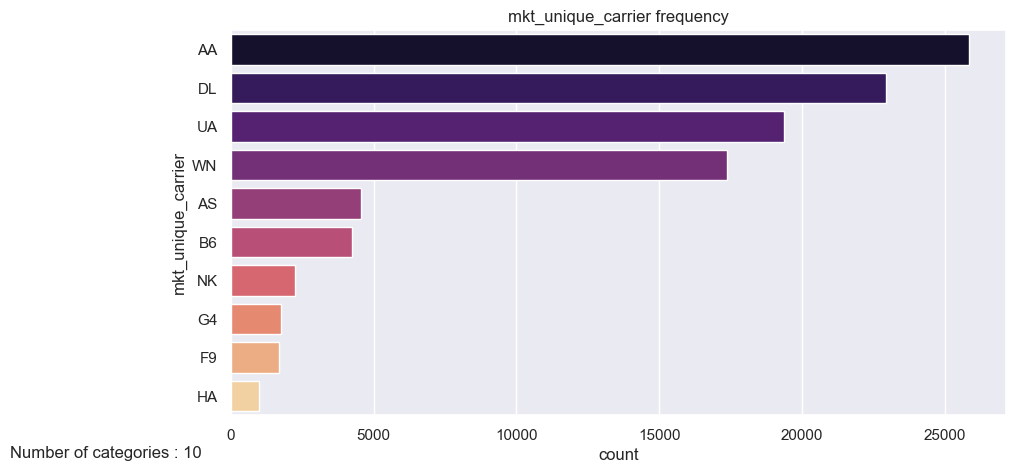

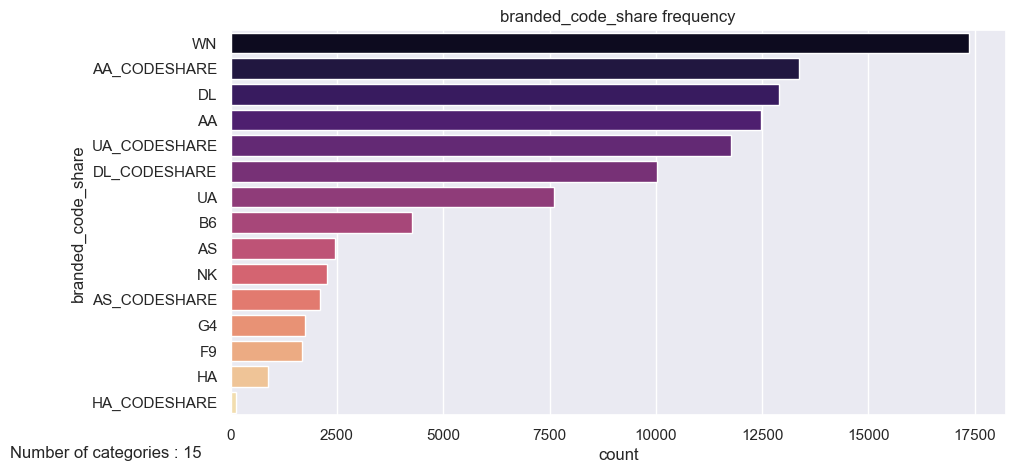

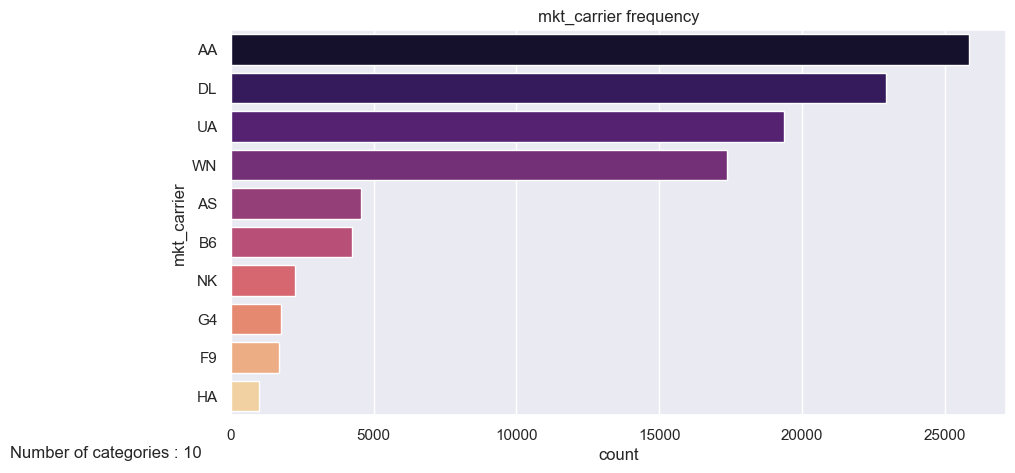

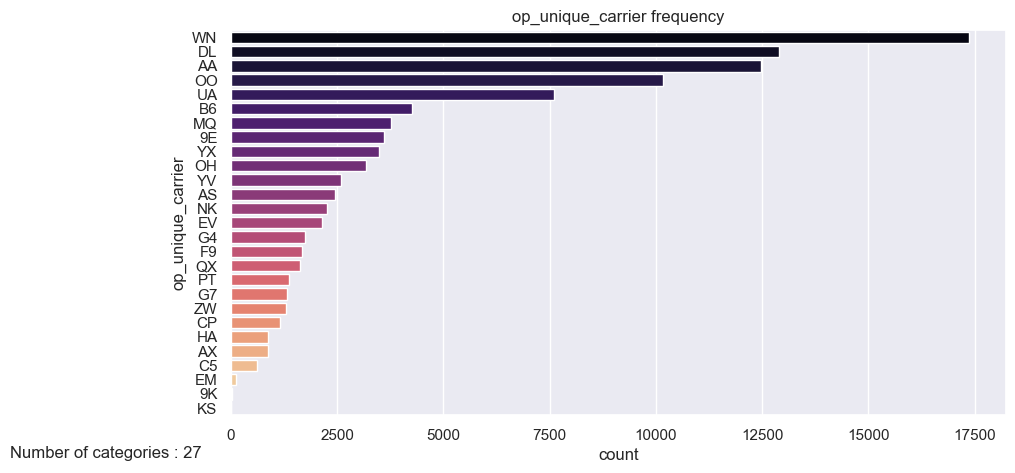

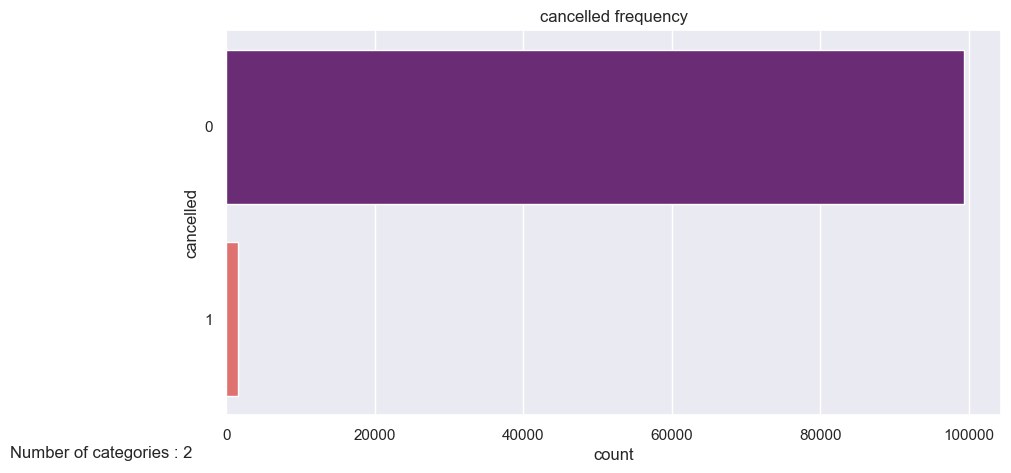

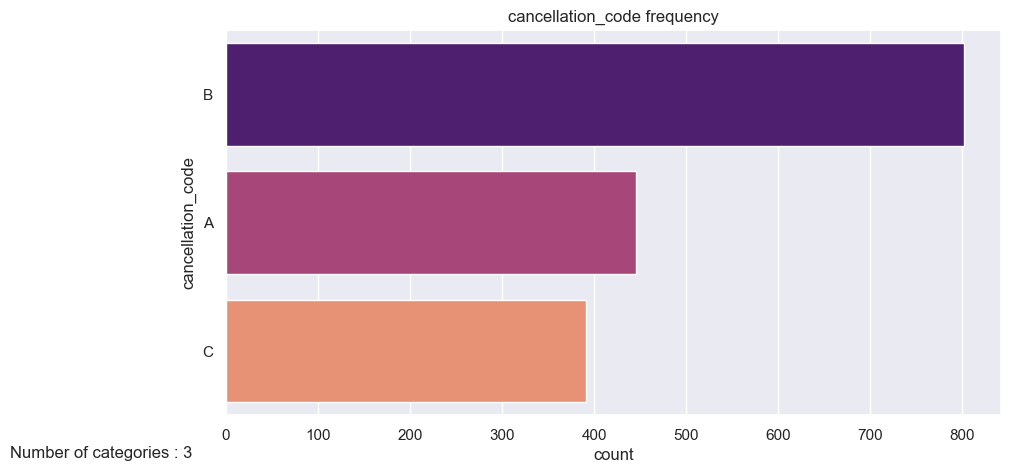

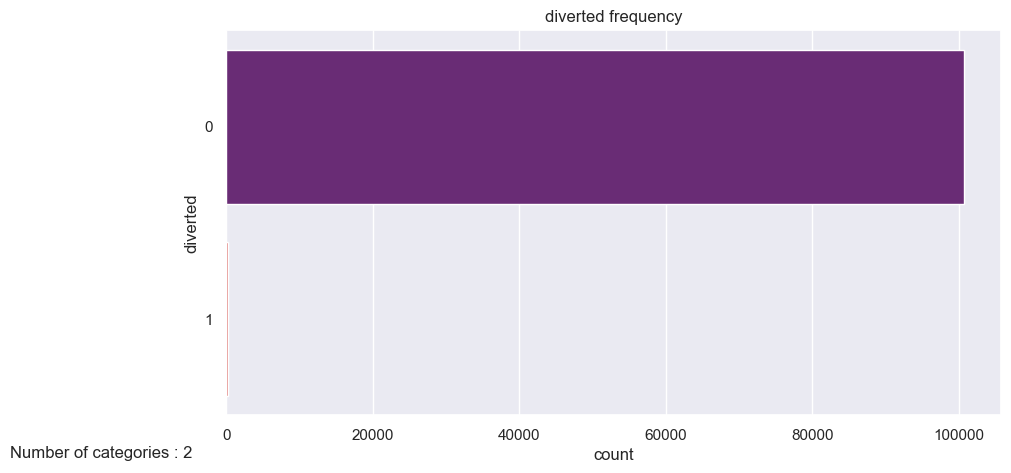

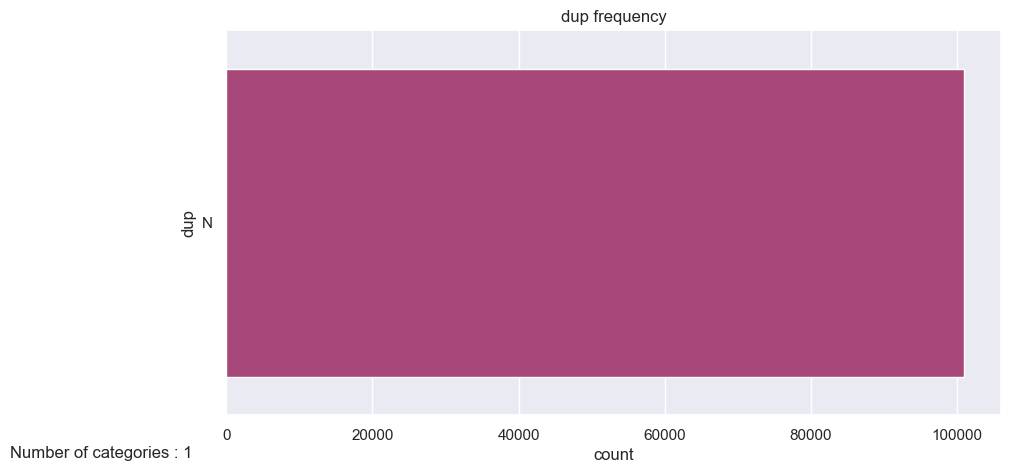

In [36]:
for feat in ['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier','op_unique_carrier','cancelled','cancellation_code', 'diverted', 'dup']:
    uni_analyis_categorical(df_flights, feature=feat)

In [37]:
df_flights['origin_city_name'].value_counts()

Chicago, IL                           6383
Atlanta, GA                           5192
New York, NY                          4064
Dallas/Fort Worth, TX                 3752
Denver, CO                            3288
Los Angeles, CA                       3235
Charlotte, NC                         2975
Houston, TX                           2825
Washington, DC                        2763
Las Vegas, NV                         2443
Phoenix, AZ                           2369
Seattle, WA                           2310
San Francisco, CA                     2308
Detroit, MI                           2261
Minneapolis, MN                       2072
Newark, NJ                            1970
Boston, MA                            1932
Philadelphia, PA                      1917
Orlando, FL                           1875
Salt Lake City, UT                    1651
Fort Lauderdale, FL                   1313
Baltimore, MD                         1283
Miami, FL                             1171
San Diego, 

### Explore the Target Variable

In [38]:
# descriptive statistics

df_flights['dep_delay'].describe()

count    99380.000000
mean        10.565144
std         46.406515
min        -35.000000
25%         -6.000000
50%         -2.000000
75%          6.000000
max       1503.000000
Name: dep_delay, dtype: float64

<AxesSubplot: xlabel='dep_delay', ylabel='Count'>

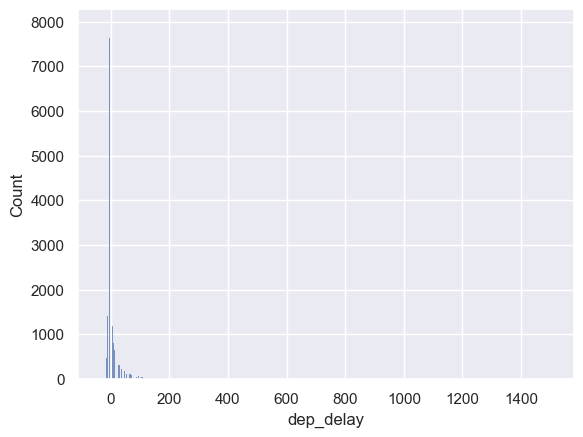

In [39]:
# histogram

sns.histplot(df_flights['dep_delay'])

In [40]:
filter = df_flights[['month','flights']]
flights_per_month = filter.groupby('month', as_index=False).mean('flights').sort_values(by='month', ascending=False)

KeyError: "['month'] not in index"

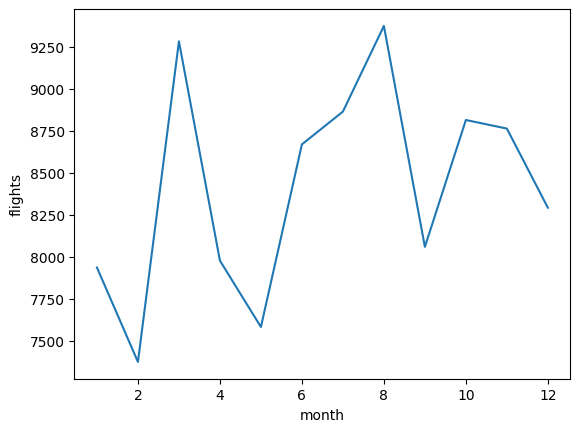

In [ ]:
g = sns.lineplot(data=flights_per_month, x='month',y='flights')

# Step 3 - Bi-Variate Analysis

In [ ]:
quant_ratio_df.columns

Index(['dep_delay', 'arr_delay', 'taxi_out', 'taxi_in', 'crs_elapsed_time',
       'actual_elapsed_time', 'flights', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'total_add_gtime', 'longest_add_gtime'],
      dtype='object')

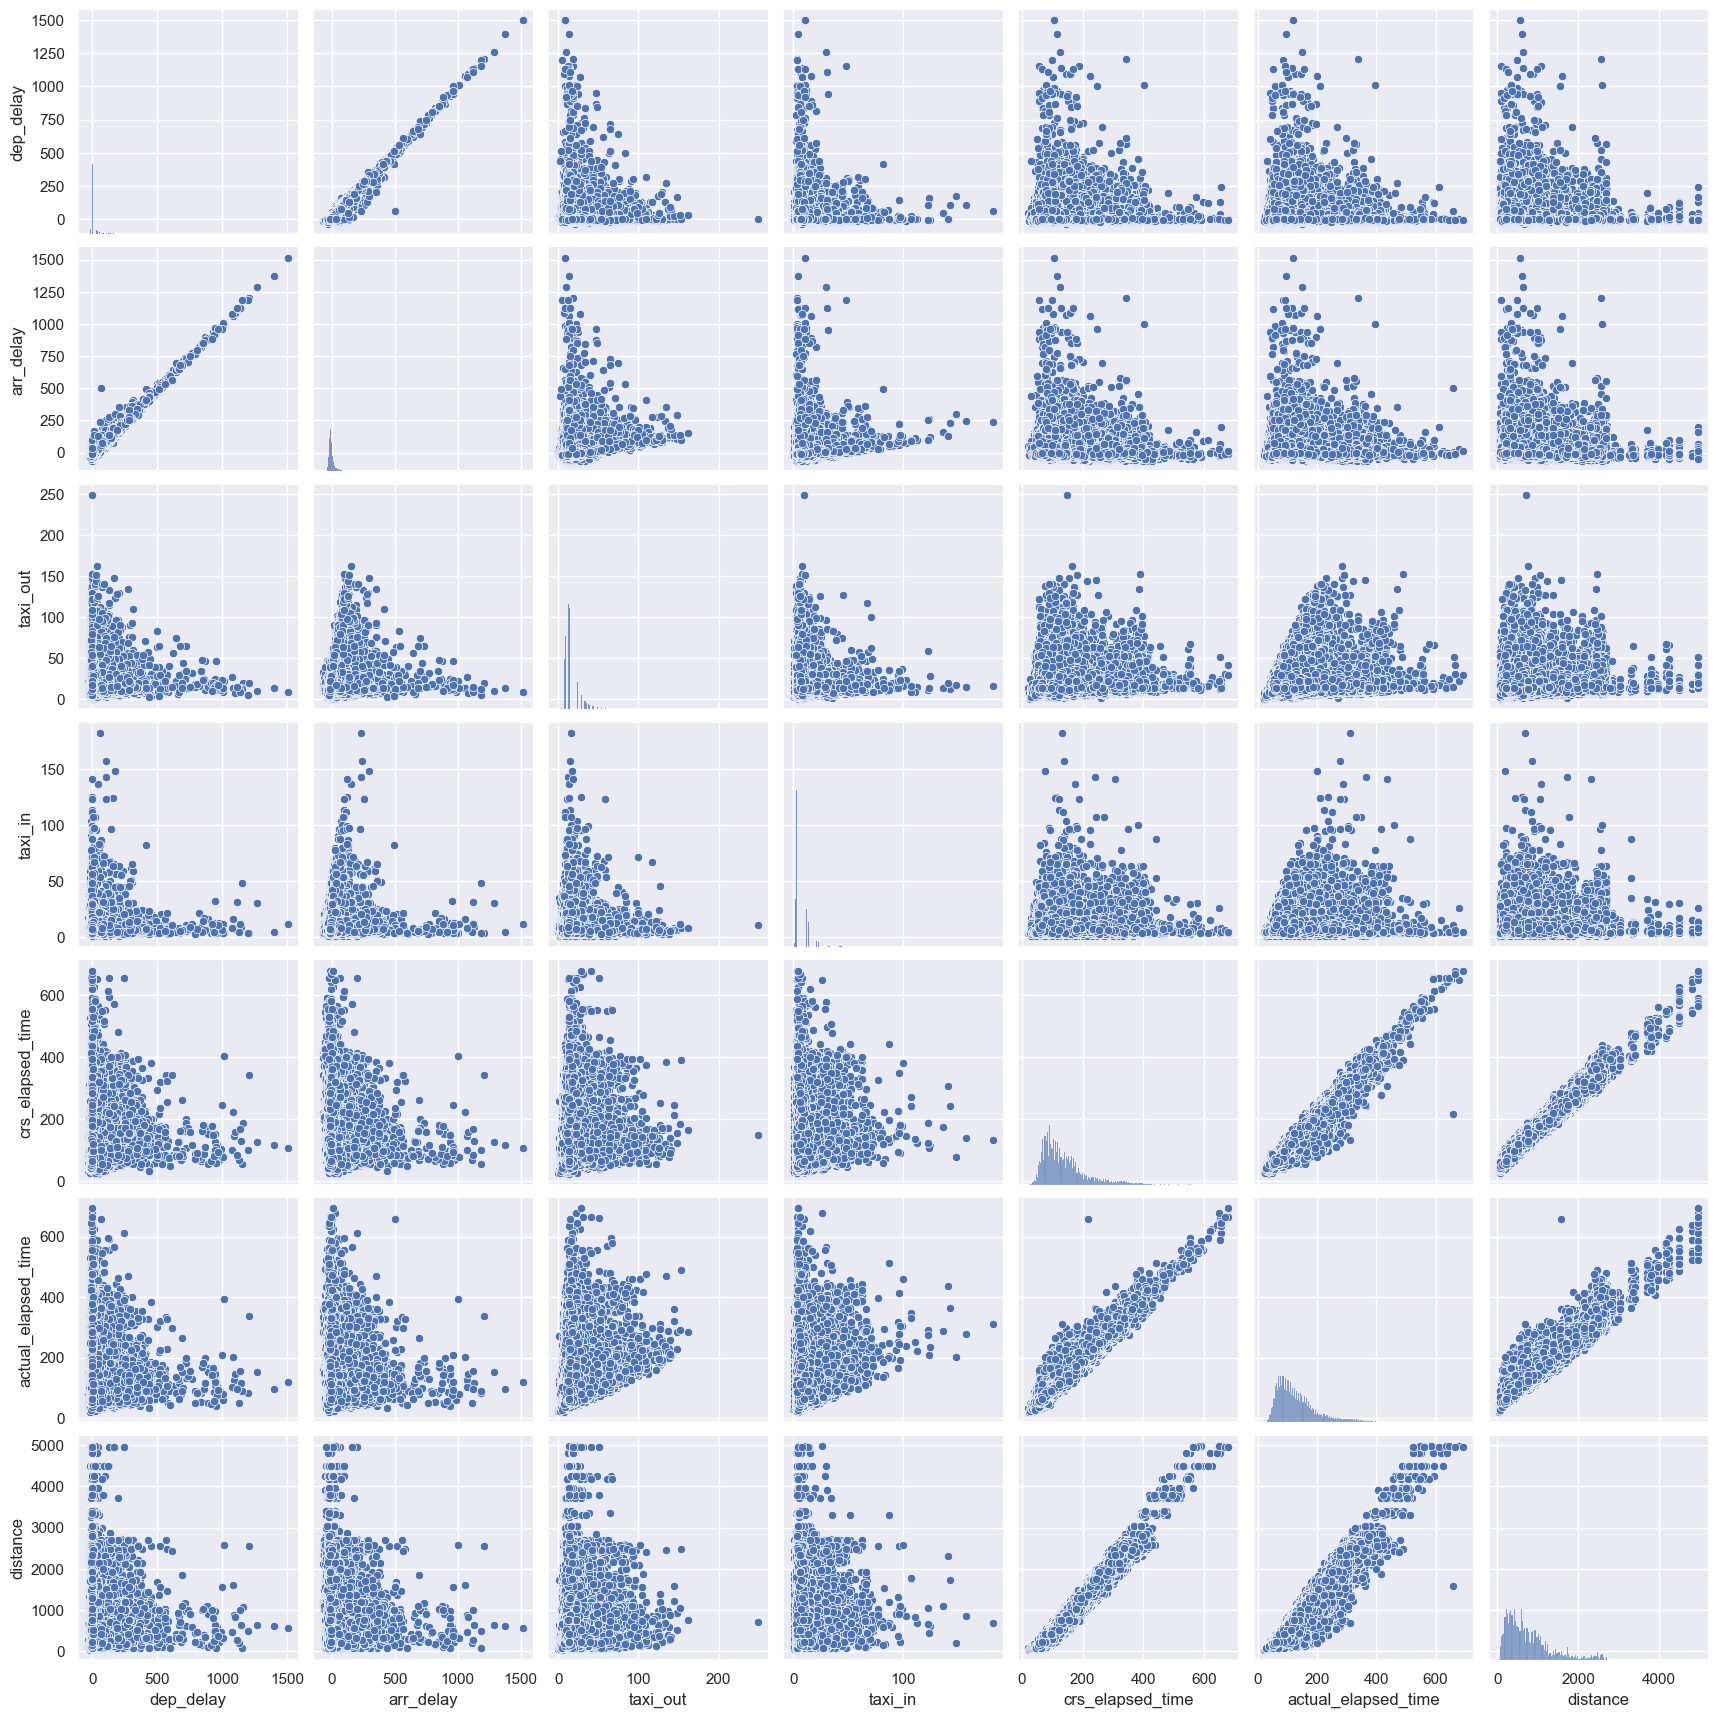

In [ ]:
quant_col_to_drop = ['flights','carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'total_add_gtime', 'longest_add_gtime']

sns.pairplot(quant_ratio_df.drop(columns=quant_col_to_drop))

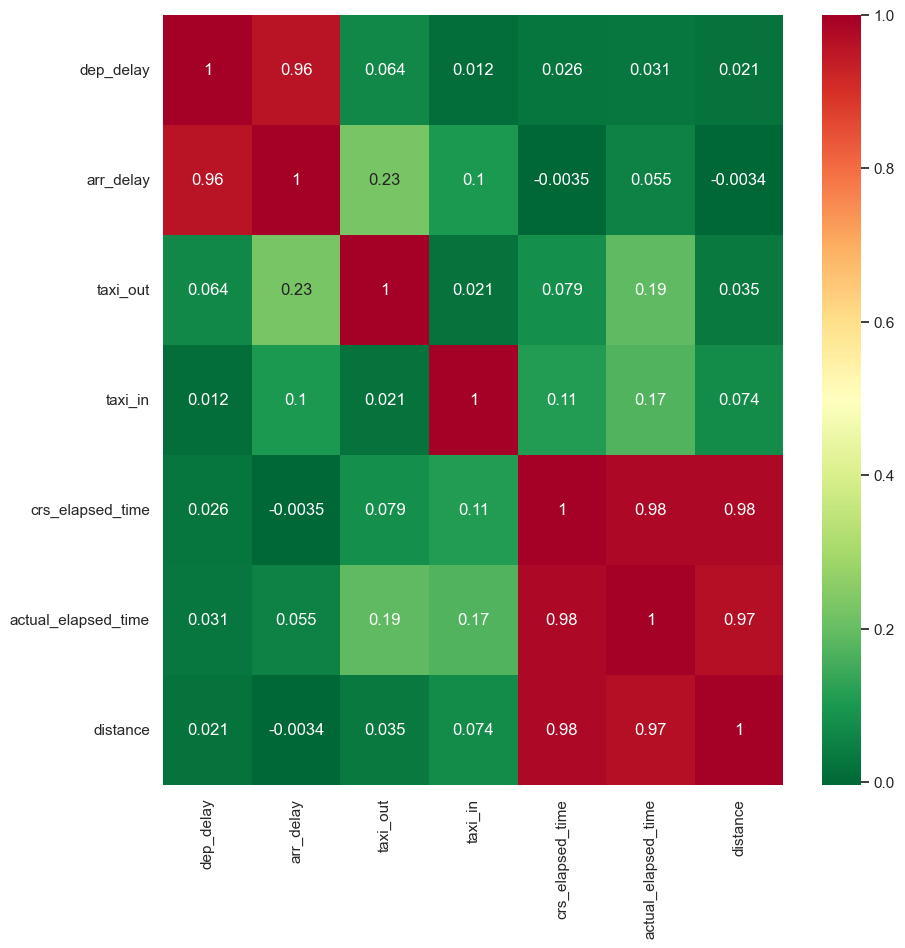

In [ ]:
corrmat = quant_ratio_df.drop(columns=quant_col_to_drop).corr()
# top_corr_features = corrmat.index[abs(corrmat["Class"])>0]
plt.figure(figsize=(10,10))
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn_r")

Because certain features are highly correlated, we will need to apply dimensionality reduction.

Do more bivariate analysis here:
- Categorical & Categorical: A Stacked Column Chart shows how the frequencies are spread between the two categorical variables.
- Categorical & Continuous: Here, the best visualization in my opinion is building boxplots combined with swarmplots.